<a href="https://colab.research.google.com/github/adigulalkari/EDA-DA/blob/main/EDA_Theory_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adi Gulalkari (21BDS0055) - Theory EDA DA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/Bank_Churn.csv")

#Module 1 - Understanding the Data

In [3]:
data.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [18]:
data.shape

(10000, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [10]:
numeric_columns = data.select_dtypes(include = [np.number]).columns
categorical_columns = data.select_dtypes(include = ['object']).columns

print(numeric_columns)
print(categorical_columns)

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [11]:
data.describe()

CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Exited  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [12]:
data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

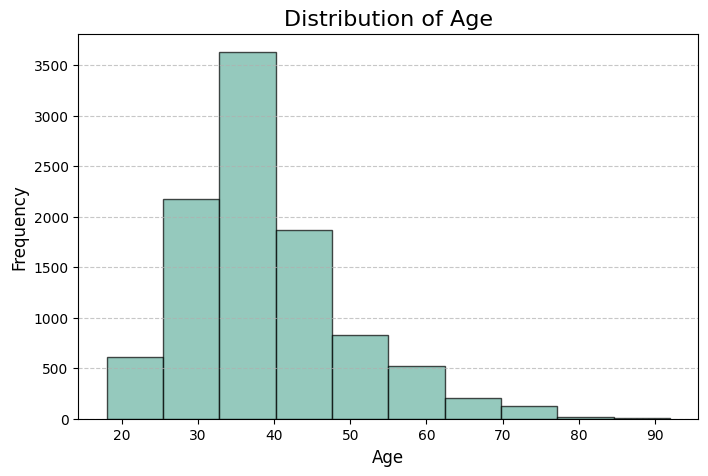

In [14]:
# Plot histogram for Age
plt.figure(figsize=(8, 5))
plt.hist(data['Age'], bins=10, color='#69b3a2', edgecolor='black', alpha=0.7)
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

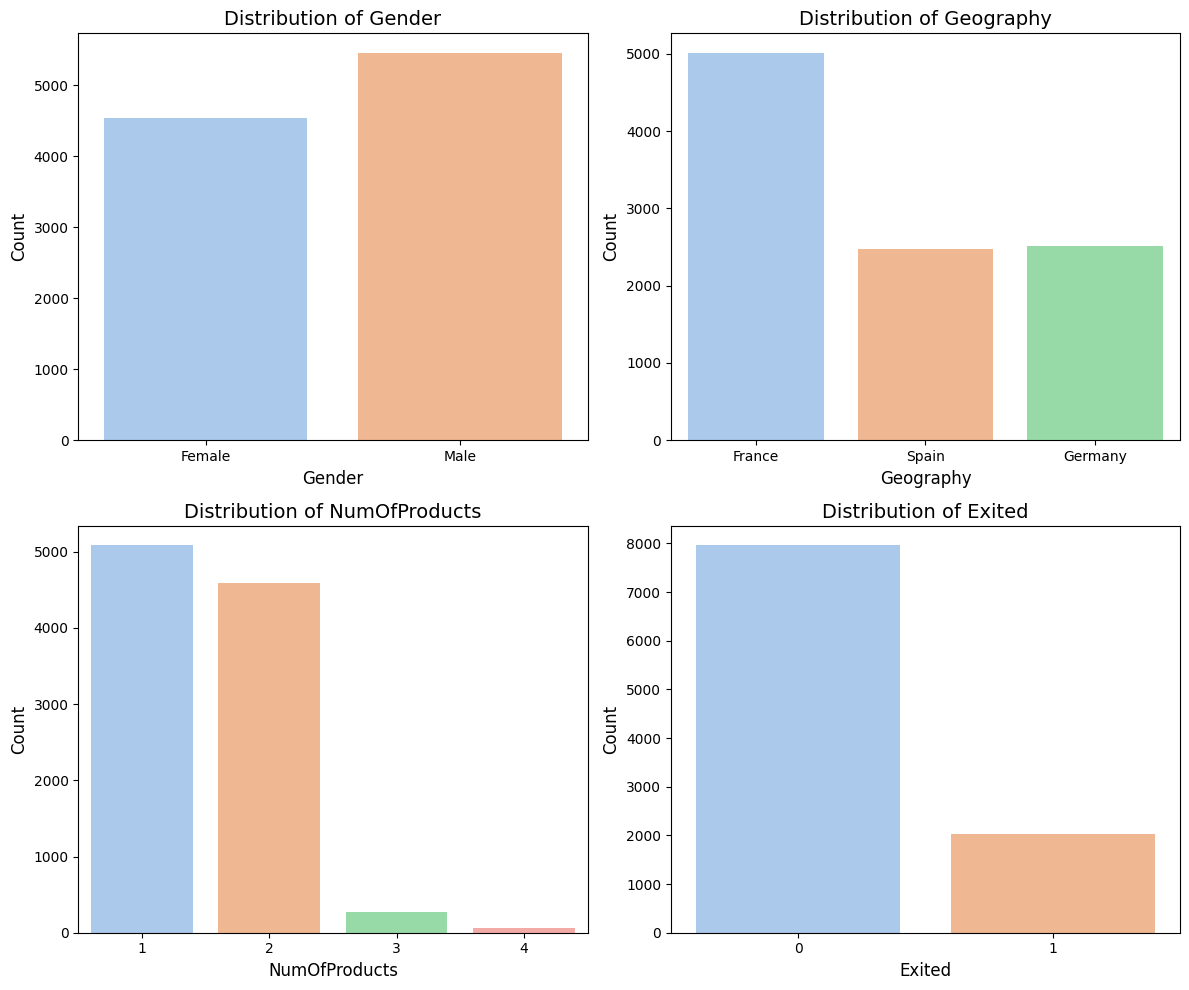

In [17]:
# Create countplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
categorical_features = ['Gender', 'Geography', 'NumOfProducts', 'Exited']
for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, palette="pastel", ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}", fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

#Module 2 - Data Transformation

In [21]:
# Check for duplicate entries
duplicates = data.duplicated()
print(f"Number of duplicate entries: {duplicates.sum()}")

# Display duplicate rows
if duplicates.sum() > 0:
    print("\nDuplicate rows:")
    print(data[duplicates])

# Although there are no duplicate values showing function to remove duplicate rows
data = data.drop_duplicates()

# Verify after removal - expected the shape size as previous shape
print(f"\nDataset shape after removing duplicates: {data.shape}")


Number of duplicate entries: 0

Dataset shape after removing duplicates: (10000, 13)


      CreditScore CreditScore_Binned
0             619            Average
1             608            Average
2             502            Average
3             699               Good
4             850          Excellent
...           ...                ...
9995          771               Good
9996          516            Average
9997          709               Good
9998          772               Good
9999          792               Good

[10000 rows x 2 columns]


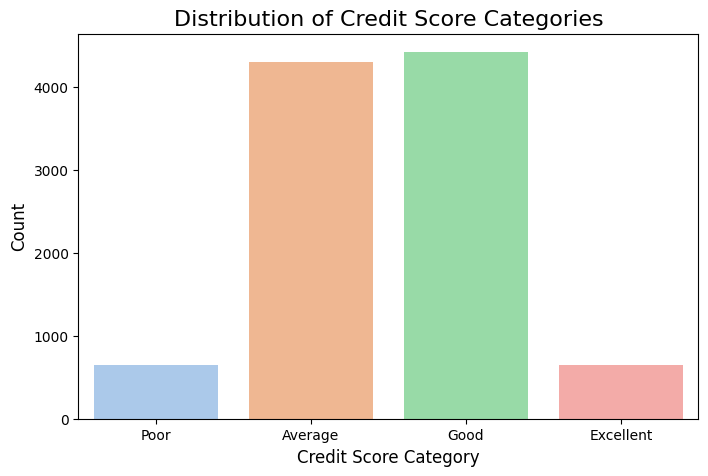

In [22]:
# Define bins for CreditScore
bins = [0, 500, 650, 800, 900]  # Specify bin edges
labels = ['Poor', 'Average', 'Good', 'Excellent']  # Labels for the bins

# Create a new column for binned CreditScore
data['CreditScore_Binned'] = pd.cut(data['CreditScore'], bins=bins, labels=labels, include_lowest=True)

# Display the updated DataFrame with the new column
print(data[['CreditScore', 'CreditScore_Binned']])

# Countplot to visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='CreditScore_Binned', palette='pastel')
plt.title('Distribution of Credit Score Categories', fontsize=16)
plt.xlabel('Credit Score Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


#Module 3 - Correlation and Time Series Analysis

Since we don't have time series data we will be focussing on correlation

##Univariate Analysis

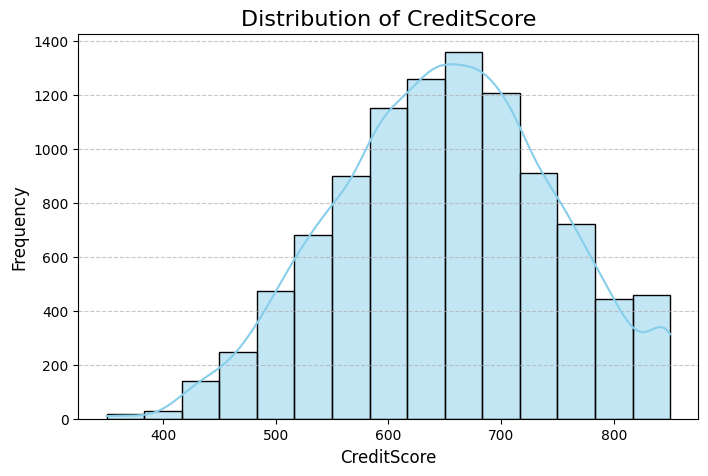

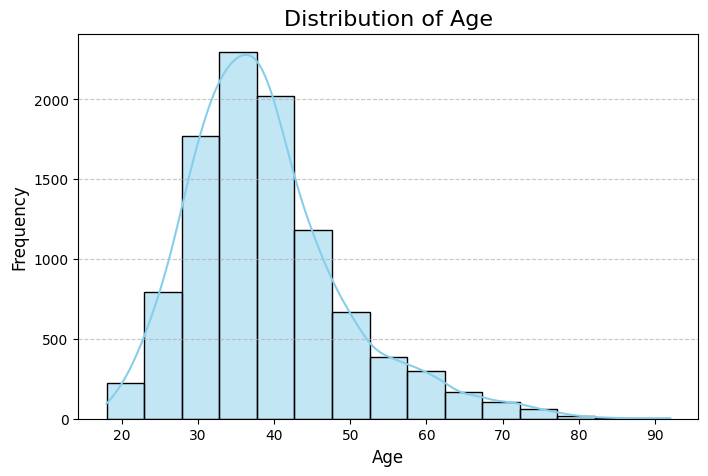

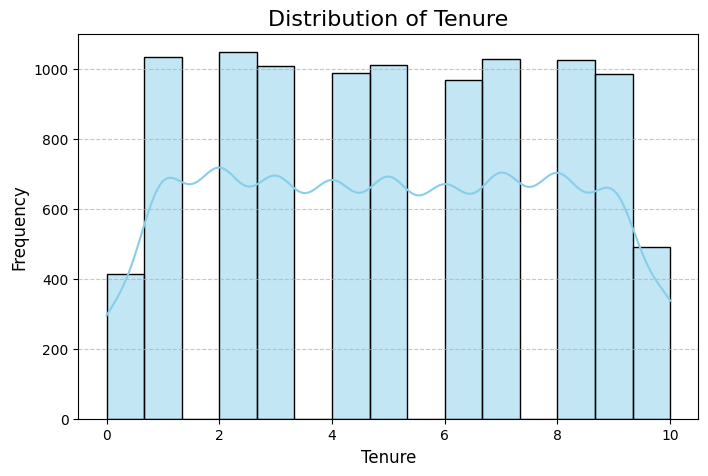

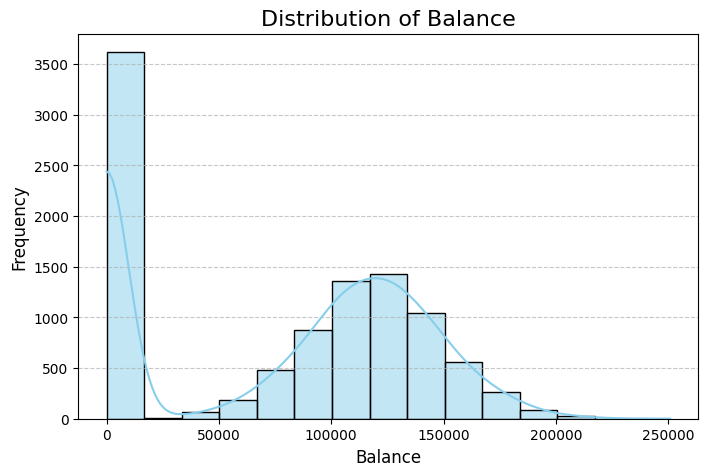

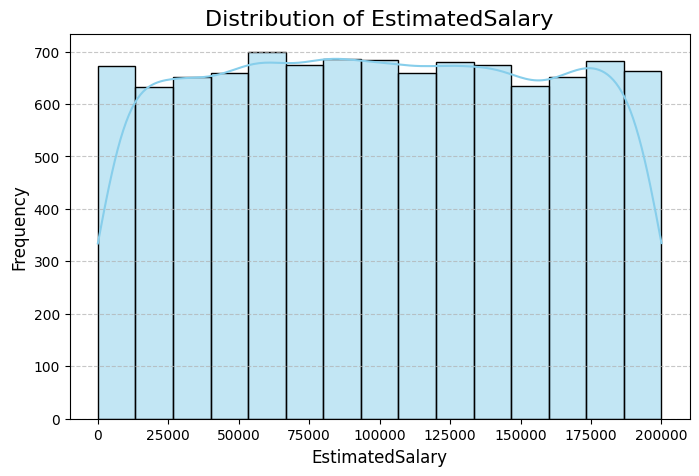

In [24]:
# Numerical and categorical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

# Univariate Analysis for Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



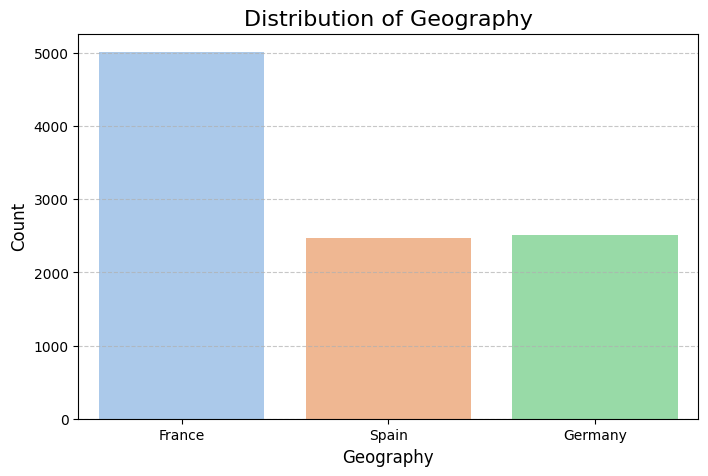

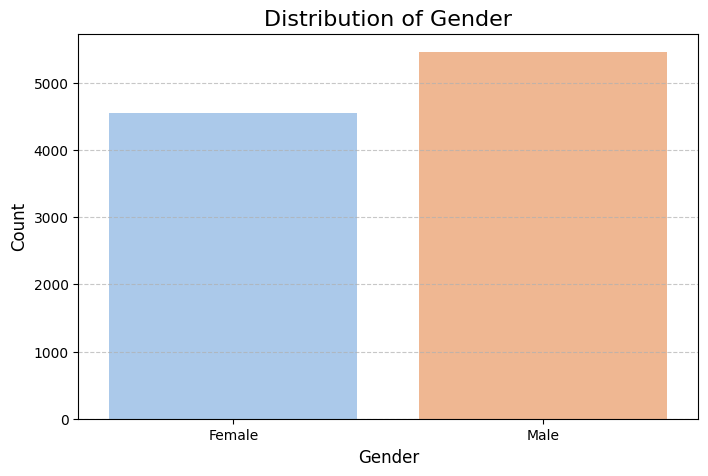

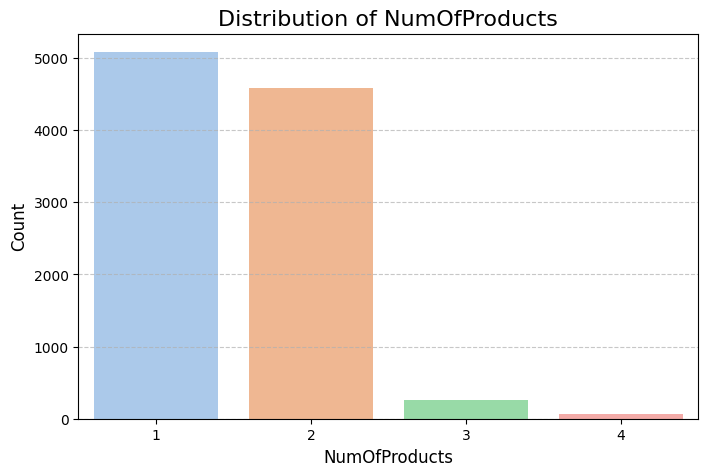

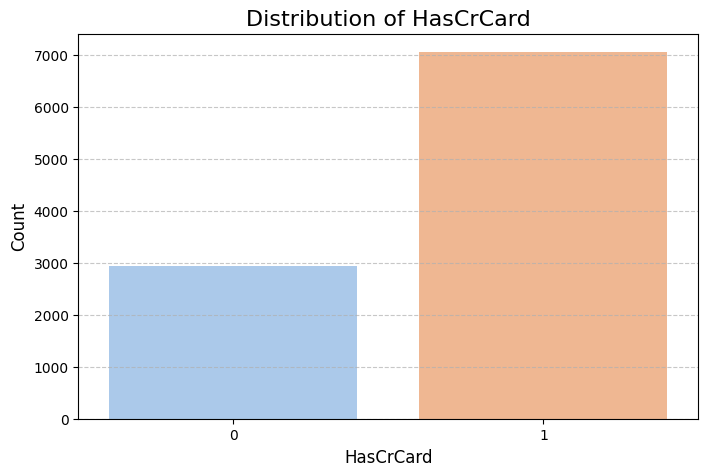

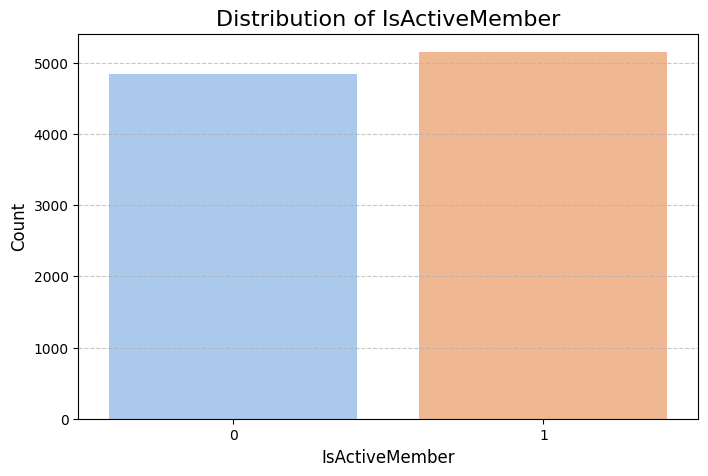

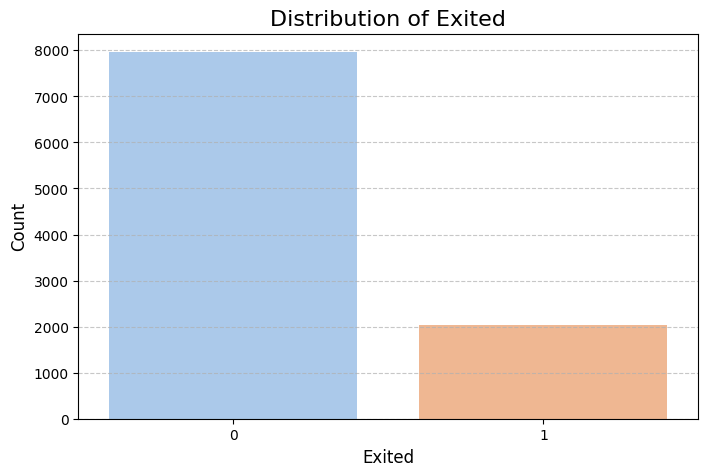

In [25]:
# Univariate Analysis for Categorical Features
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=feature, palette="pastel")
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


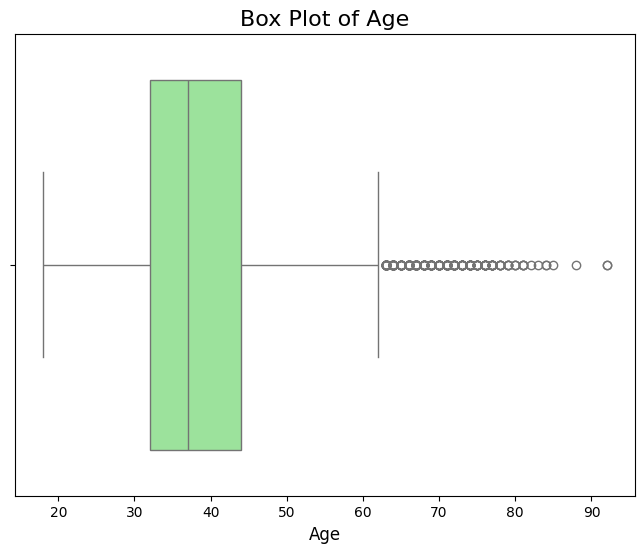

In [27]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Age'], color='lightgreen')
plt.title('Box Plot of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.show()

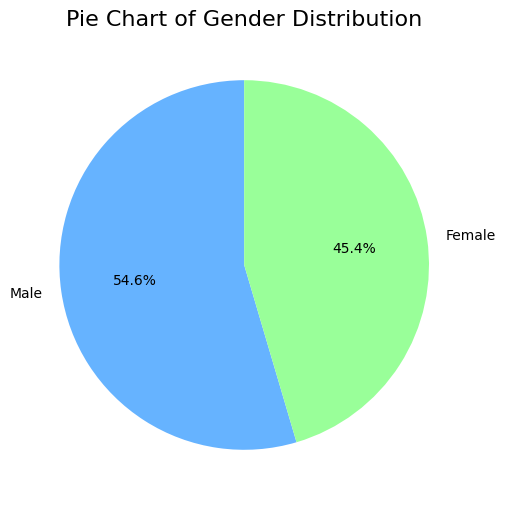

In [30]:
# Pie Chart
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=90, legend=False)
plt.title('Pie Chart of Gender Distribution', fontsize=16)
plt.ylabel('')
plt.show()

## Bivariate Analysis

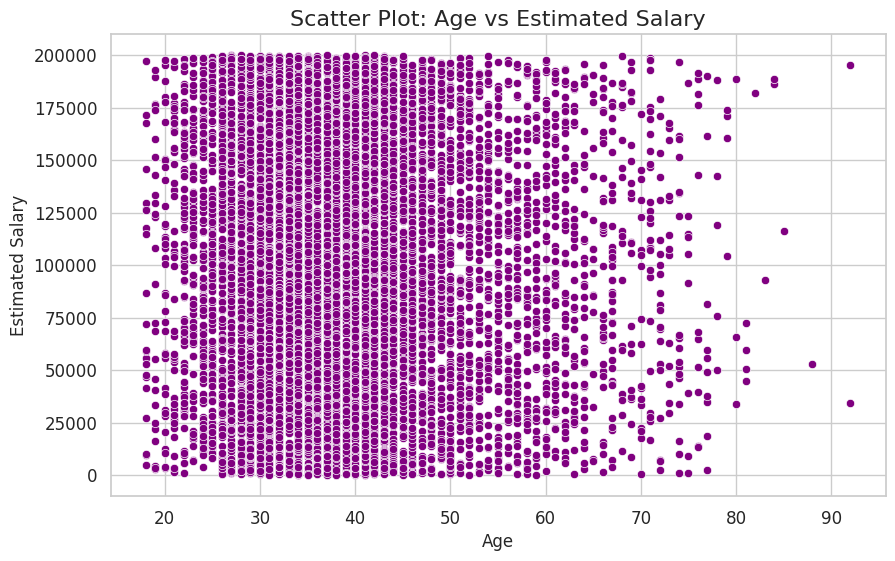

In [31]:
# Set the plotting style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Scatter Plot between Age and EstimatedSalary
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['EstimatedSalary'], color='purple')
plt.title('Scatter Plot: Age vs Estimated Salary', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Estimated Salary', fontsize=12)
plt.show()


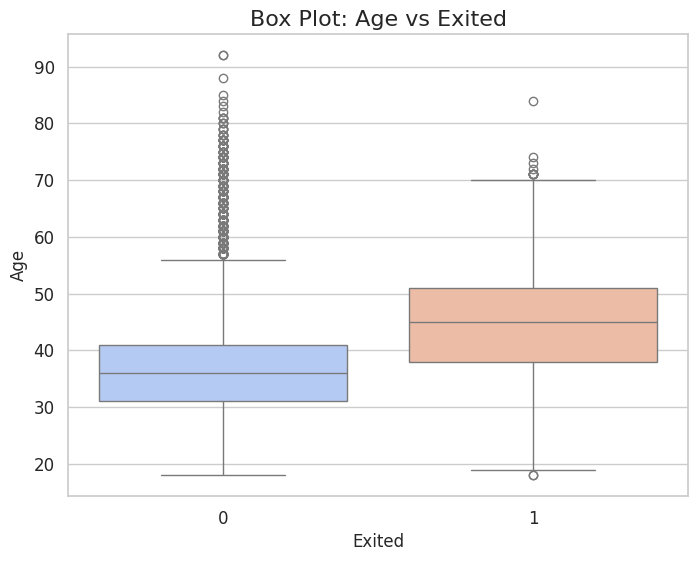

In [32]:
# 2. Box Plot for Age and Exited (target variable)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Age', data=data, palette='coolwarm')
plt.title('Box Plot: Age vs Exited', fontsize=16)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

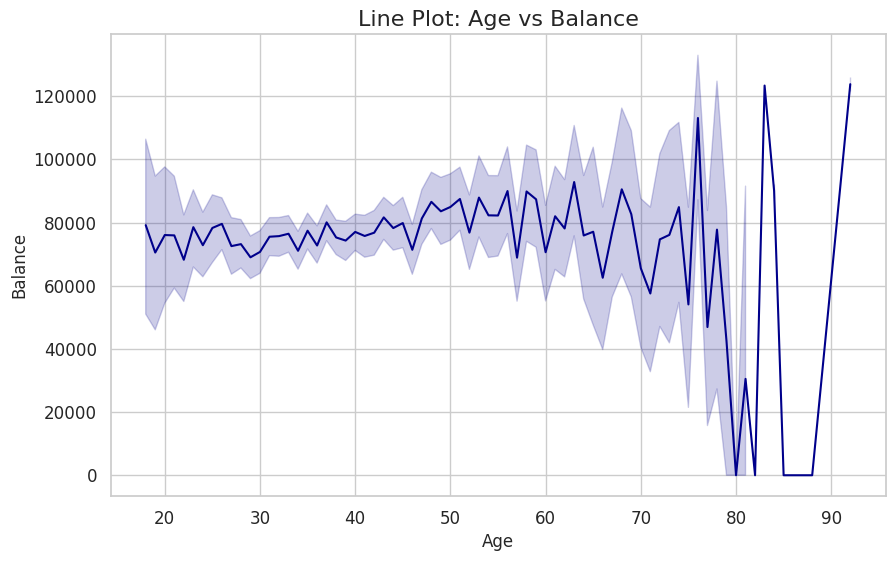

In [34]:
# 3. Line Plot for Age and Balance (showing trends over age)
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['Age'], y=data['Balance'], color='darkblue', markers='o')
plt.title('Line Plot: Age vs Balance', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.show()

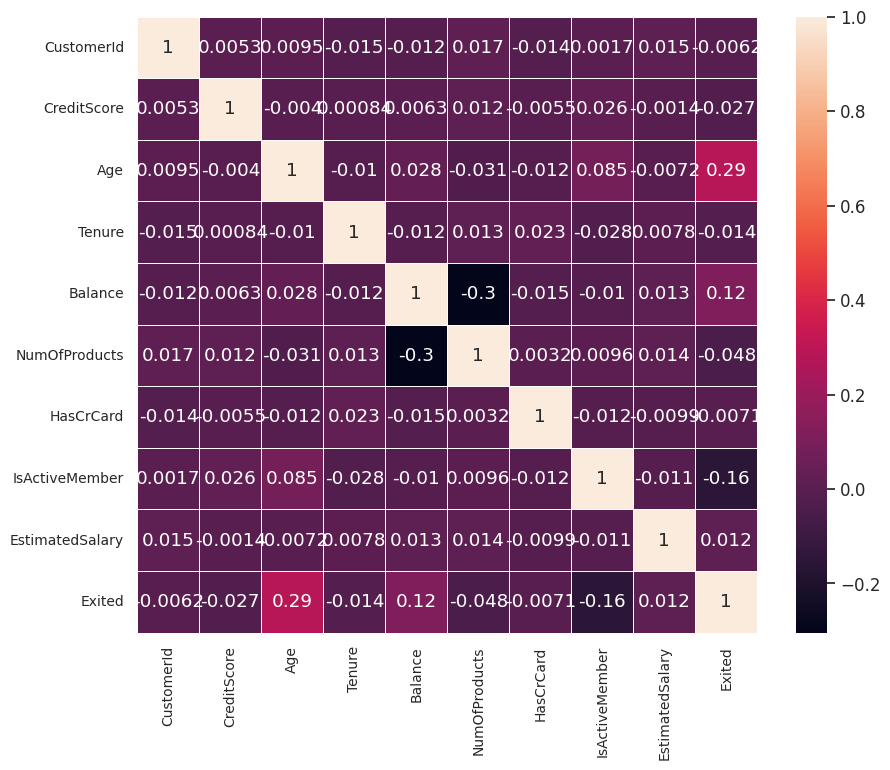

In [36]:
# 4. Correlation Matrix for numerical features
def correlation_matrix(data):
  num_cols = data.select_dtypes(include = np.number).columns
  data = data[num_cols]
  fig = plt.gcf()
  fig.set_size_inches(10,8)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize = 10)
  sns.heatmap(data.corr(), annot = True, linewidths = 0.5)
  plt.show()

correlation_matrix(data)

##Multivariate Analysis

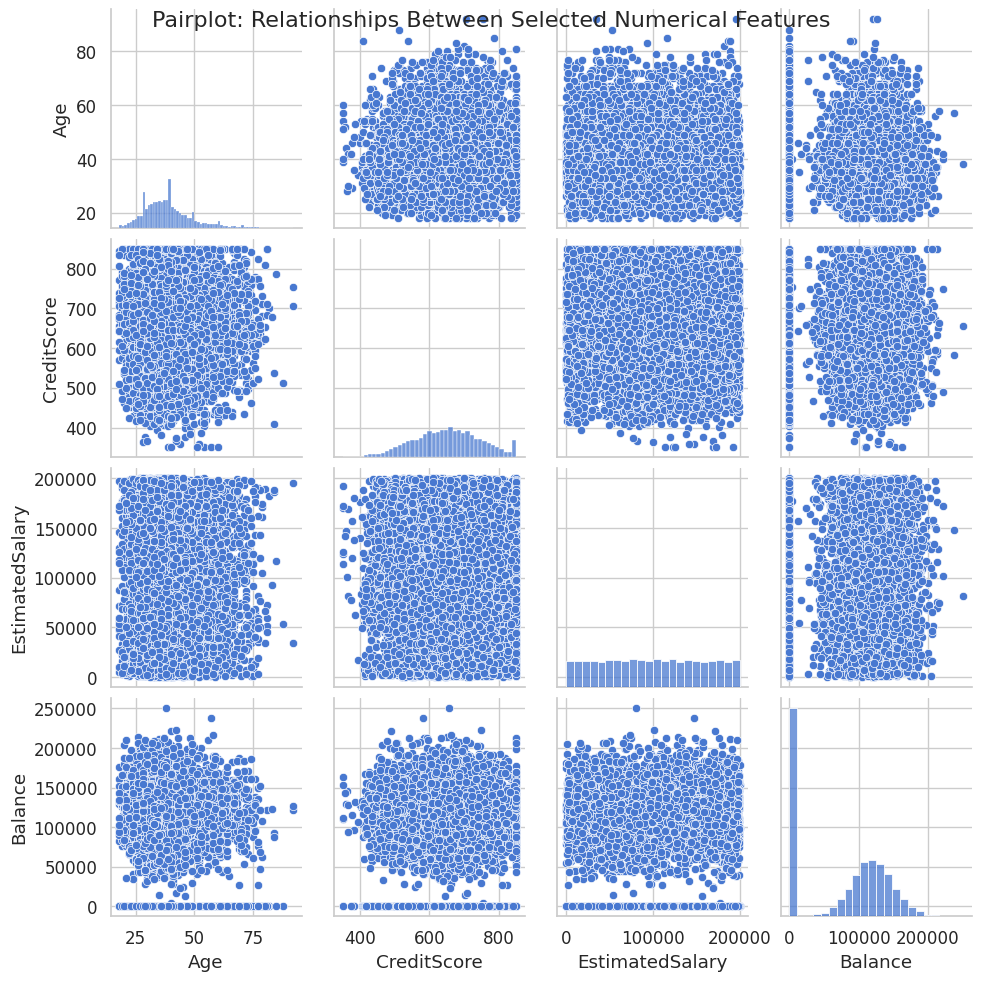

In [37]:
# 1. Pairplot for a few numerical features to observe their relationship
sns.pairplot(data[['Age', 'CreditScore', 'EstimatedSalary', 'Balance']])
plt.suptitle('Pairplot: Relationships Between Selected Numerical Features', fontsize=16)
plt.show()

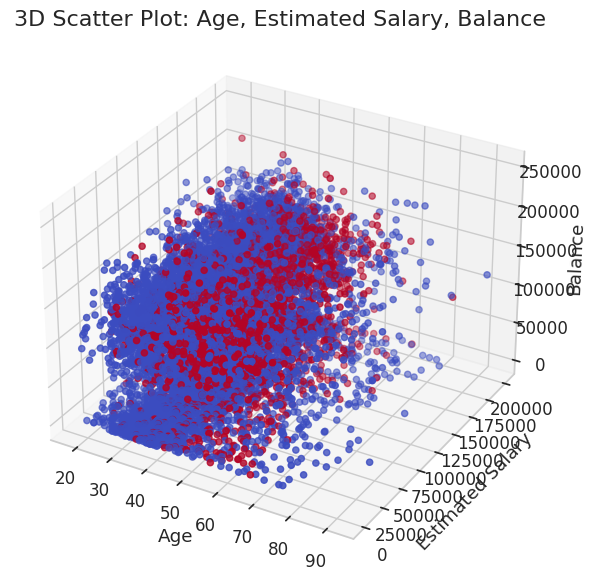

In [38]:
# 3. 3D Scatter Plot for Age, EstimatedSalary, and Balance
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data['Age'], data['EstimatedSalary'], data['Balance'], c=data['Exited'], cmap='coolwarm', marker='o')

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Estimated Salary')
ax.set_zlabel('Balance')
ax.set_title('3D Scatter Plot: Age, Estimated Salary, Balance', fontsize=16)
plt.show()

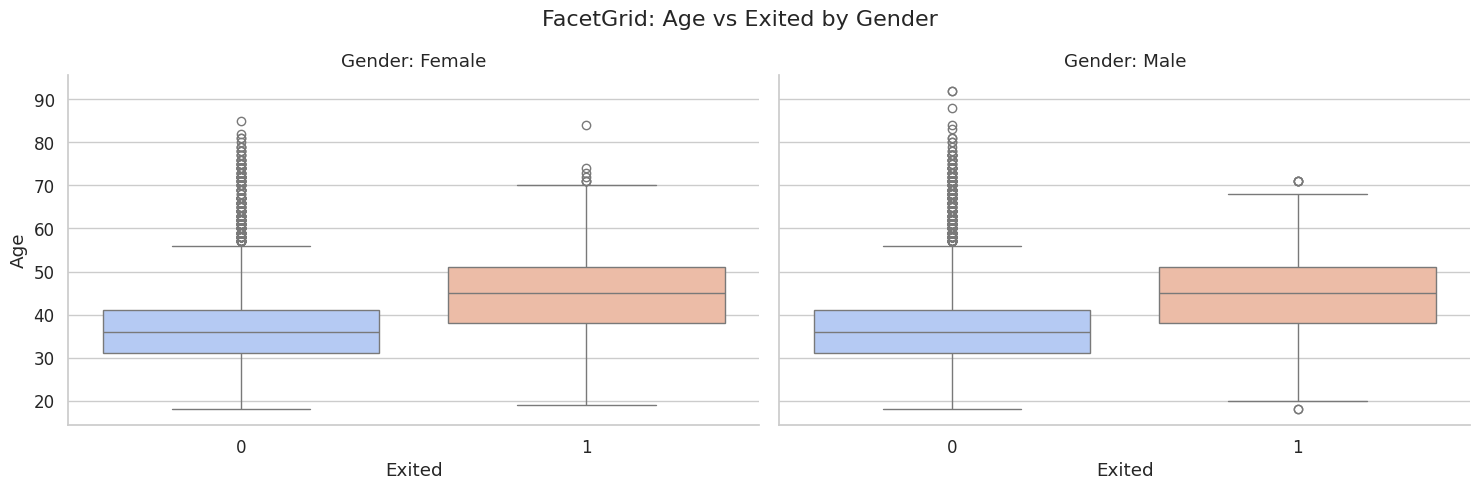

In [39]:
# 4. FacetGrid for Age vs Exited split by Gender
g = sns.FacetGrid(data, col="Gender", height=5, aspect=1.5)
g.map(sns.boxplot, 'Exited', 'Age', palette='coolwarm')
g.set_axis_labels('Exited', 'Age')
g.set_titles('Gender: {col_name}')
g.fig.suptitle('FacetGrid: Age vs Exited by Gender', fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

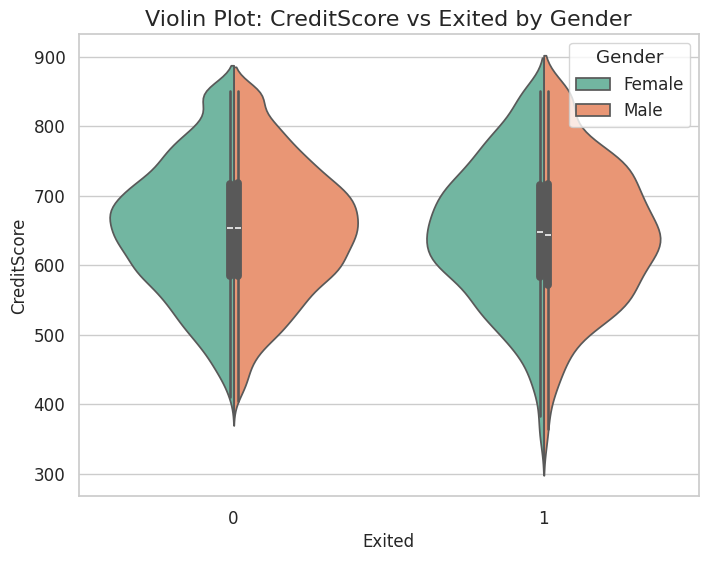

In [40]:

# 5. Violin Plot for CreditScore and Exited split by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='Exited', y='CreditScore', hue='Gender', data=data, split=True, palette='Set2')
plt.title('Violin Plot: CreditScore vs Exited by Gender', fontsize=16)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('CreditScore', fontsize=12)
plt.show()

#Module 4: Data Summarization and Visualization

##Statistical summary measures

In [45]:
# Statistical summary measures for numerical columns
numerical_summary = data.select_dtypes(include = np.number).describe().T  # Transposed for better readability

# Add additional statistical measures like median
numerical_summary['median'] = data.select_dtypes(include = np.number).median()

# Print the summary
print("Statistical Summary Measures:")
print(numerical_summary)




Statistical Summary Measures:
                   count          mean           std          min  \
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  \
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00   
CreditScore           584.00  6.520000e+02  7.180000e+02       8

##Data Eloboration


Value Counts for Categorical Features:

Geography Value Counts:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender Value Counts:
Gender
Male      5457
Female    4543
Name: count, dtype: int64

HasCrCard Value Counts:
HasCrCard
1    7055
0    2945
Name: count, dtype: int64

IsActiveMember Value Counts:
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

Exited Value Counts:
Exited
0    7963
1    2037
Name: count, dtype: int64


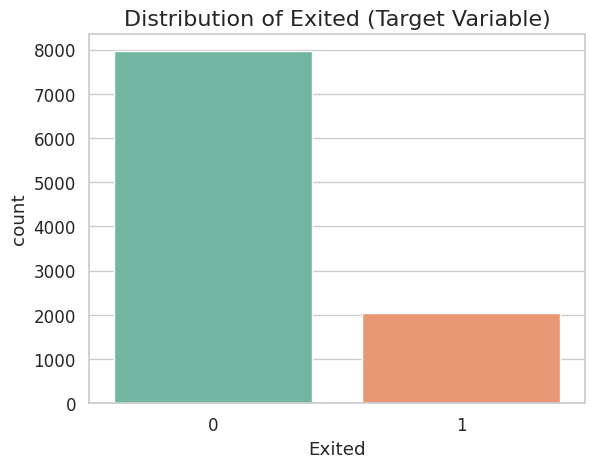

In [50]:
# Ensure the categorical columns are treated as strings (object type)
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Convert them to category type explicitly
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.astype('category'))

# Distribution of categorical columns
print("\nValue Counts for Categorical Features:")
for column in categorical_columns:
    print(f"\n{column} Value Counts:")
    print(data[column].value_counts())

# Distribution of Exited (target variable)
sns.countplot(x='Exited', data=data, palette='Set2')
plt.title('Distribution of Exited (Target Variable)', fontsize=16)
plt.show()


##1D Statistical Analysis

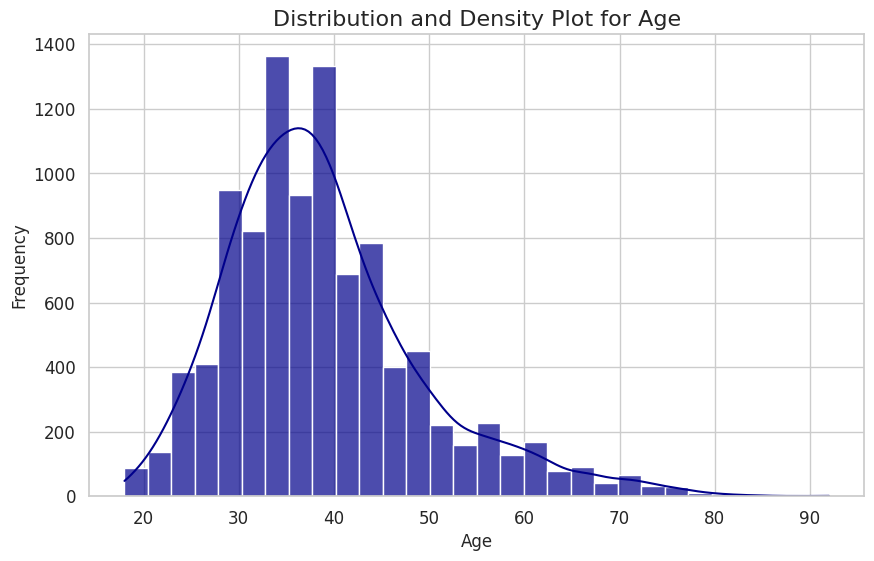

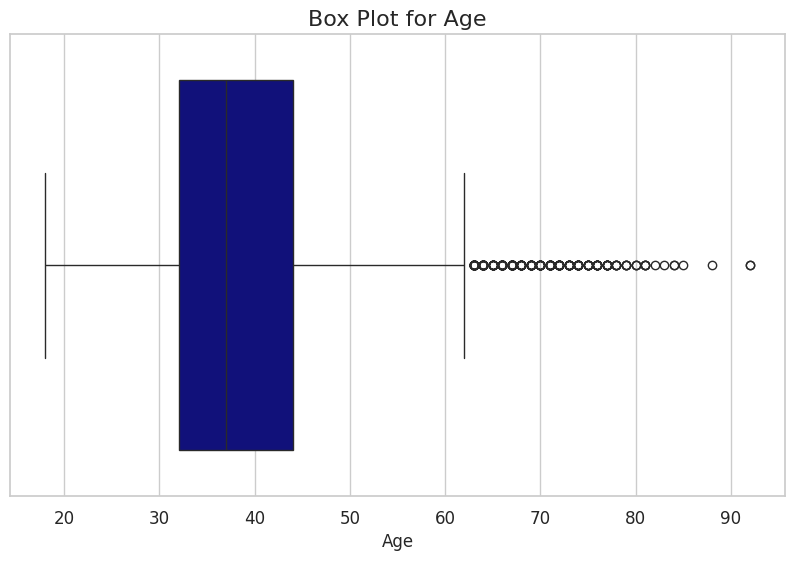

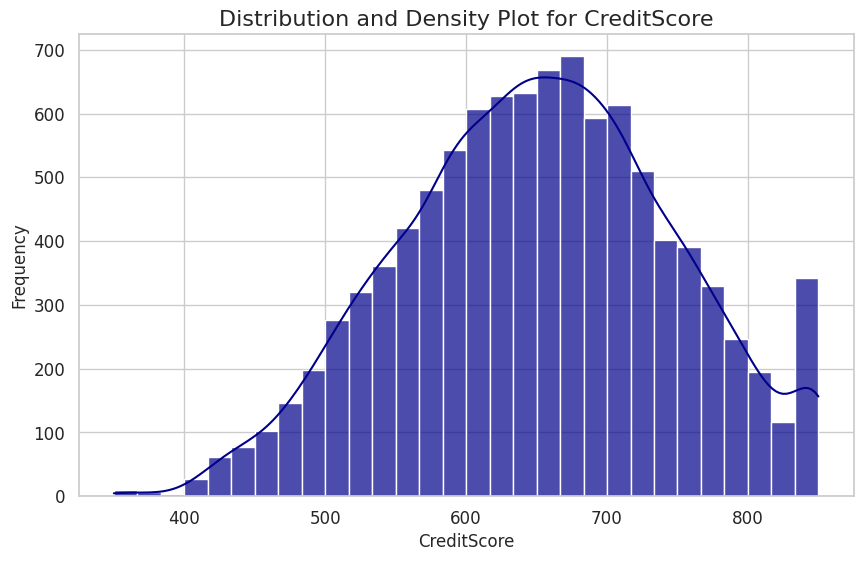

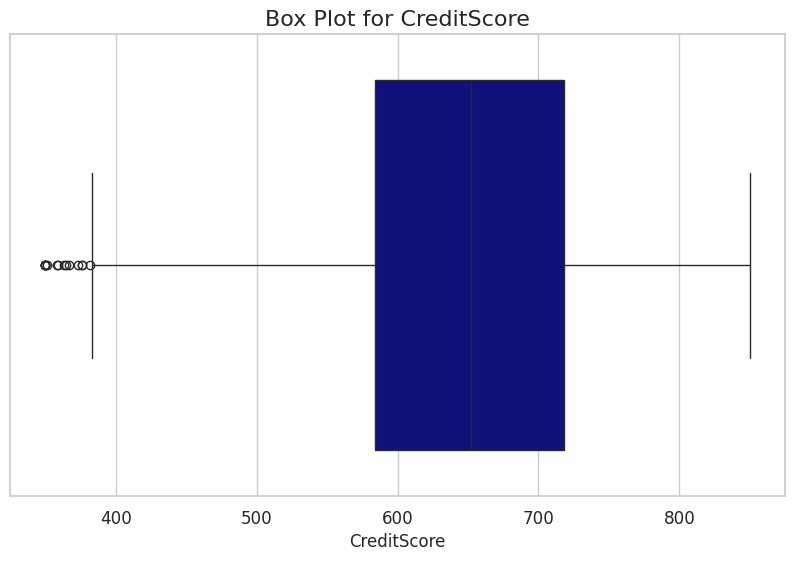

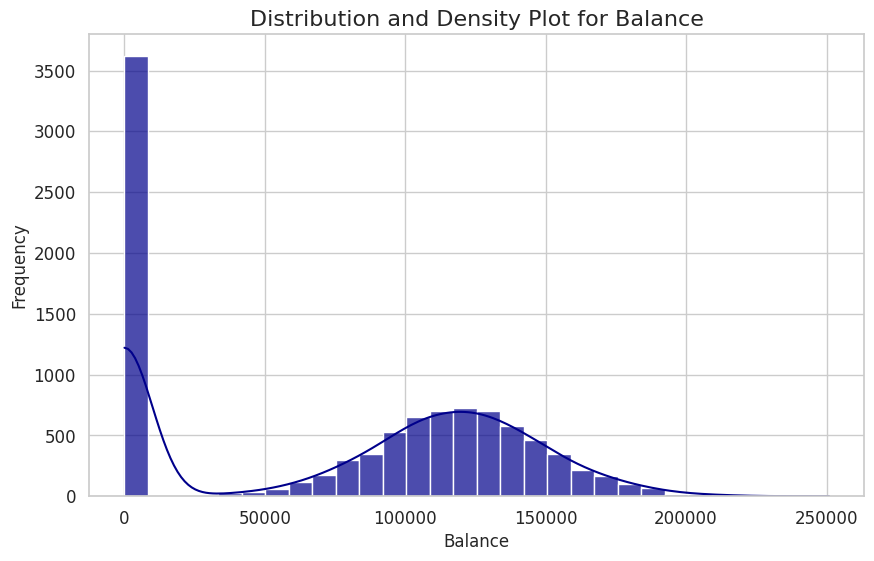

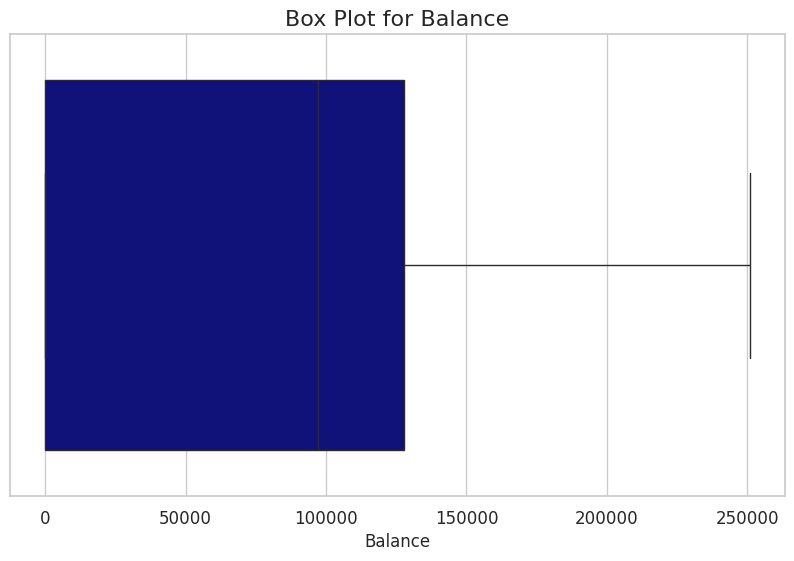

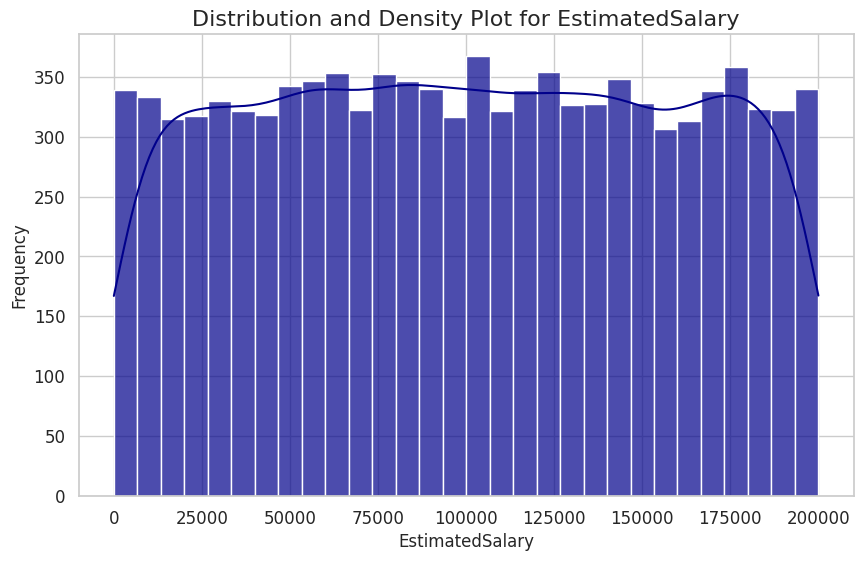

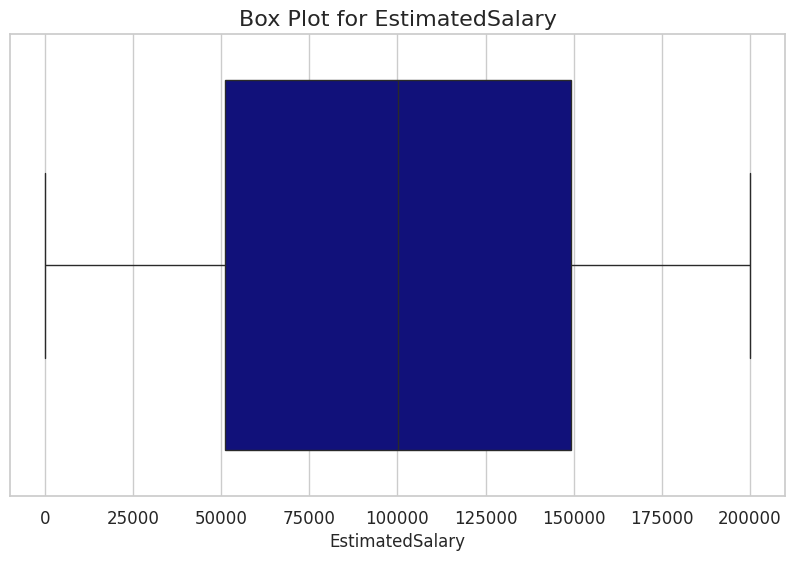

In [47]:
# 1-D Statistical Data Analysis for selected numerical columns
numerical_features = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, bins=30, color='darkblue', alpha=0.7)
    plt.title(f'Distribution and Density Plot for {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

    # Box plot for outliers and distribution
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature], color='darkblue')
    plt.title(f'Box Plot for {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.show()


##2-D Statistical Data Analysis

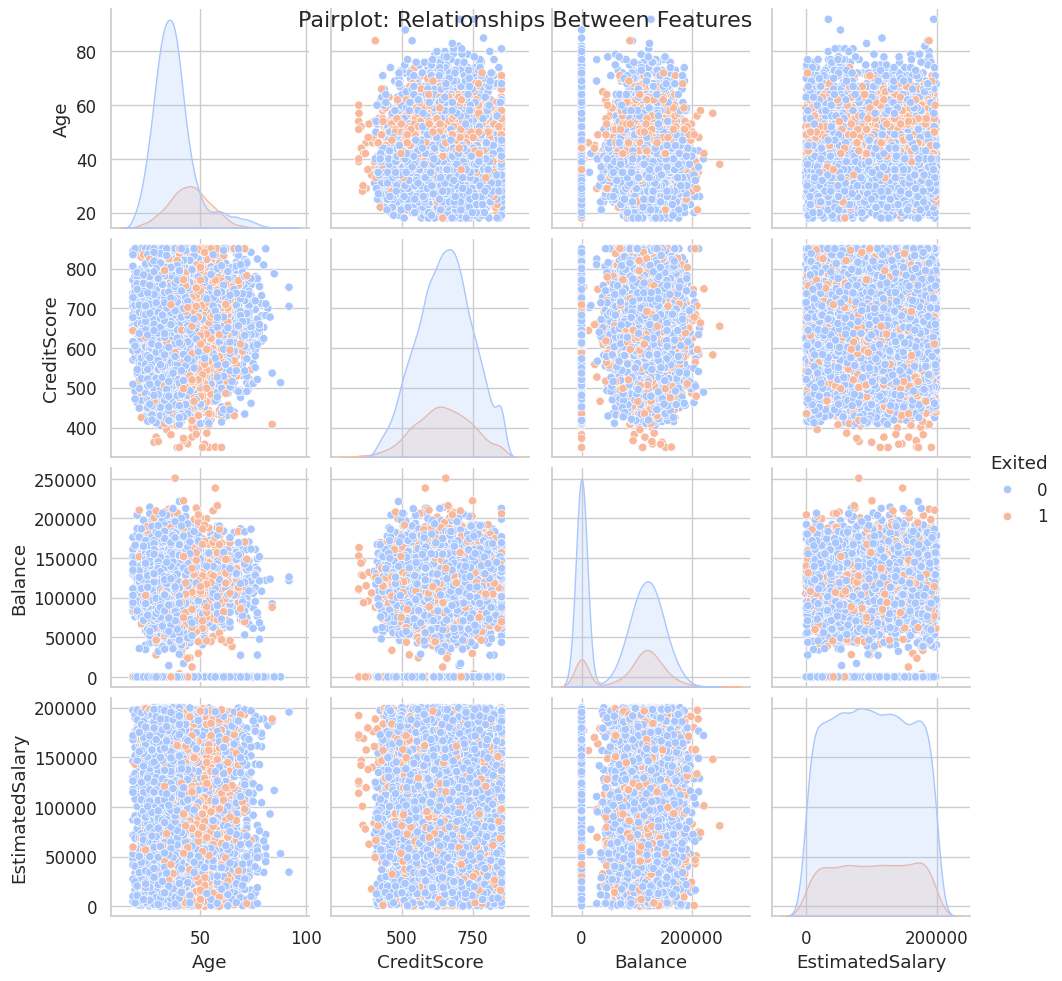

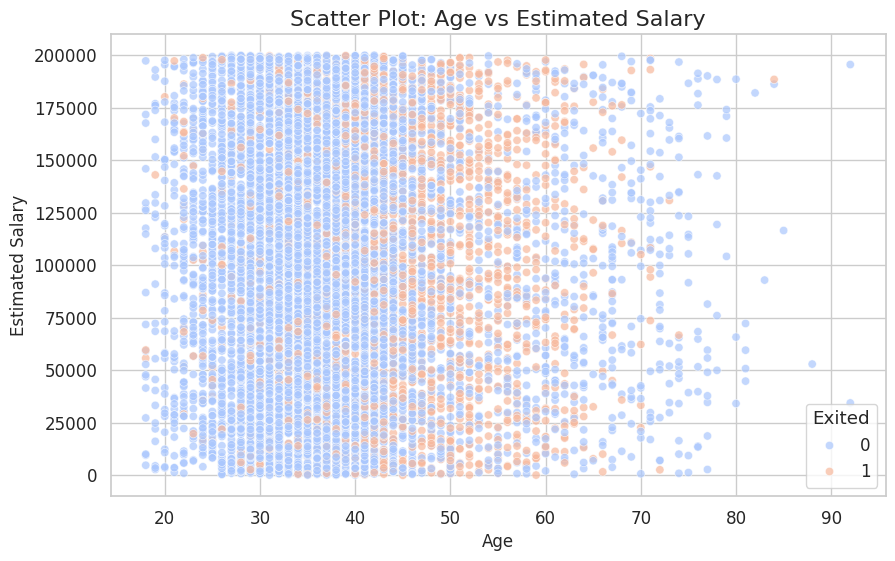

In [48]:
# 2-D Statistical Analysis: Pairplot for numerical features and their interactions
sns.pairplot(data[['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited', palette='coolwarm')
plt.suptitle('Pairplot: Relationships Between Features', fontsize=16)
plt.show()

# Scatter plot for Age vs EstimatedSalary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Exited', data=data, palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot: Age vs Estimated Salary', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Estimated Salary', fontsize=12)
plt.show()


##n-D Statistical Data Analysis

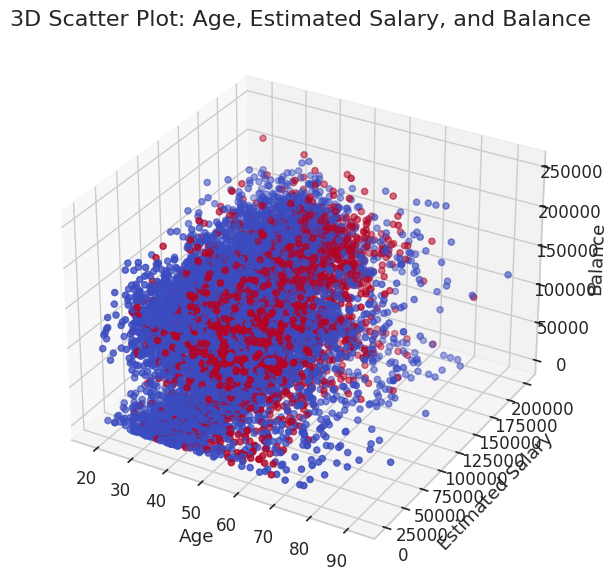

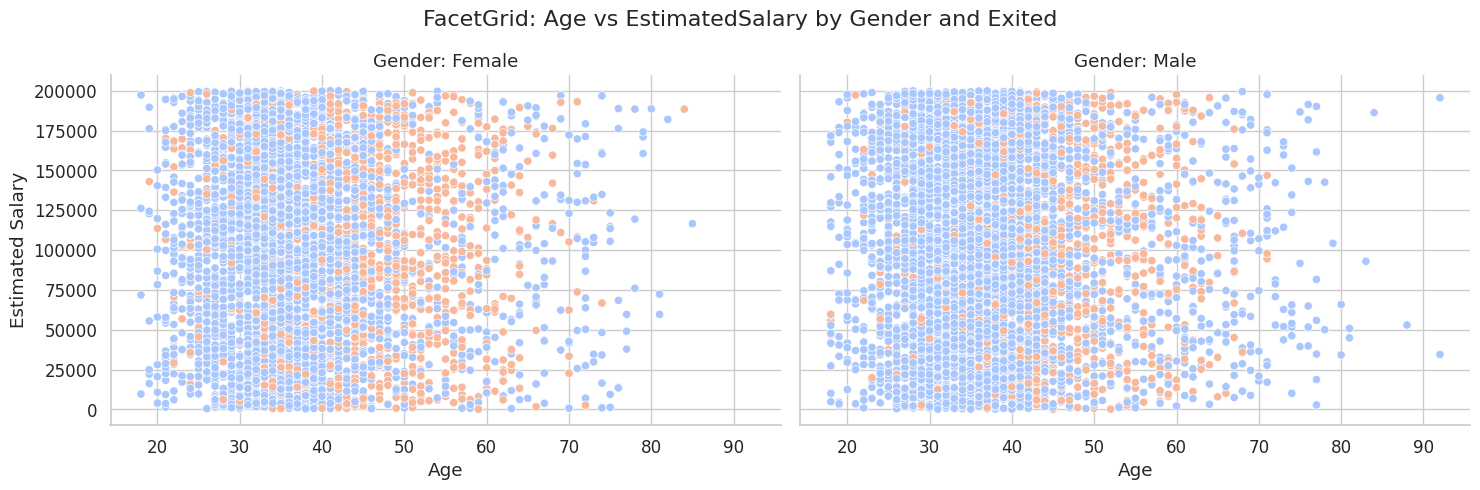

In [51]:
# 3D scatter plot for multiple numerical variables (Age, EstimatedSalary, Balance)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data['Age'], data['EstimatedSalary'], data['Balance'], c=data['Exited'], cmap='coolwarm', marker='o')

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Estimated Salary')
ax.set_zlabel('Balance')
ax.set_title('3D Scatter Plot: Age, Estimated Salary, and Balance', fontsize=16)
plt.show()

# FacetGrid: Gender vs Exited across different numerical features
g = sns.FacetGrid(data, col="Gender", height=5, aspect=1.5)
g.map(sns.scatterplot, 'Age', 'EstimatedSalary', data=data, hue='Exited', palette='coolwarm')
g.set_axis_labels('Age', 'Estimated Salary')
g.set_titles('Gender: {col_name}')
g.fig.suptitle('FacetGrid: Age vs EstimatedSalary by Gender and Exited', fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()


#Module 5 - Clustering Algorithms

In [98]:
# Import necessary libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt

# Feature selection for clustering
X = data[['Age', 'EstimatedSalary', 'Balance']]


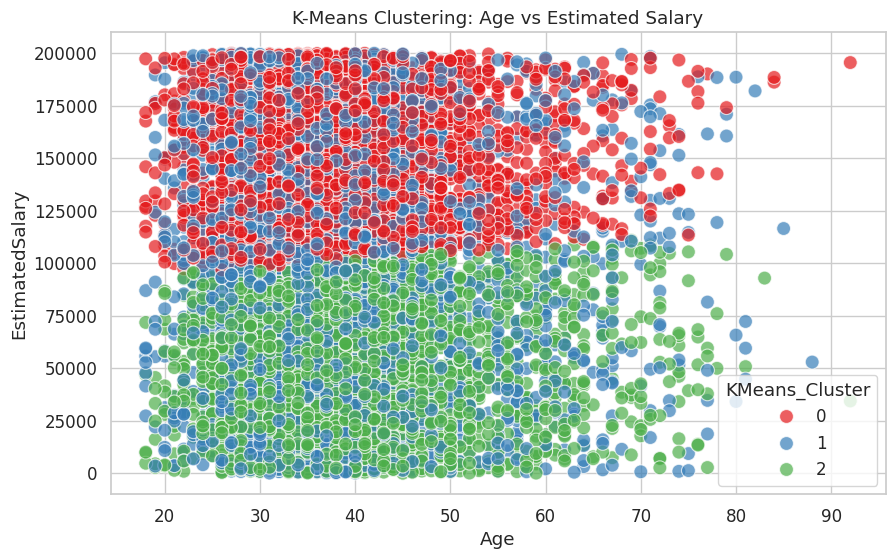

In [99]:
# --- K-Means Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Plot K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='KMeans_Cluster', data=data, palette='Set1', s=100, alpha=0.7)
plt.title('K-Means Clustering: Age vs Estimated Salary')
plt.show()




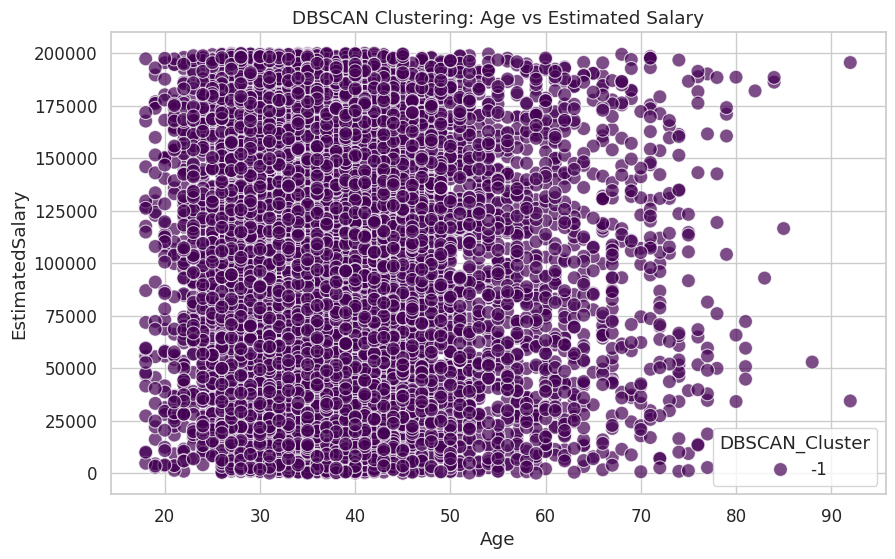

In [101]:
# --- DBSCAN Clustering ---
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Plot DBSCAN Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='DBSCAN_Cluster', data=data, palette='viridis', s=100, alpha=0.7)
plt.title('DBSCAN Clustering: Age vs Estimated Salary')
plt.show()

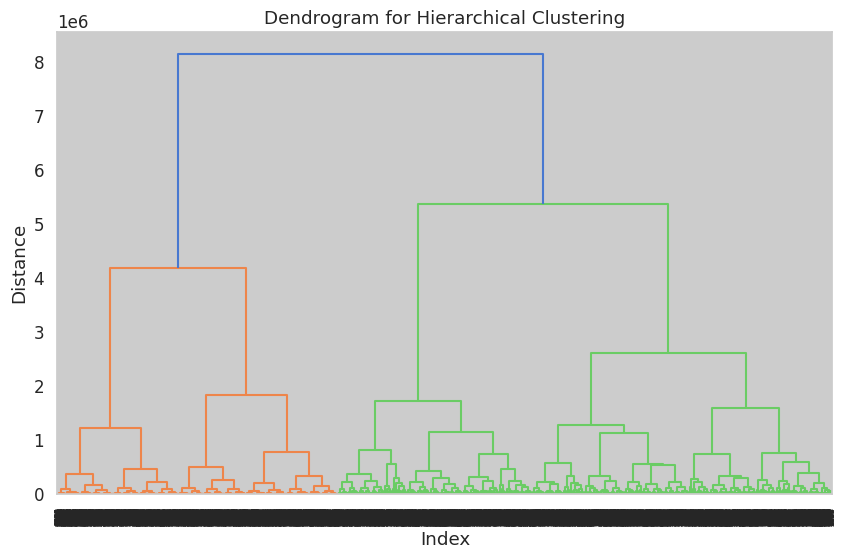

In [104]:
# --- Hierarchical Clustering ---
linked = linkage(X, method='ward')

# Plot Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

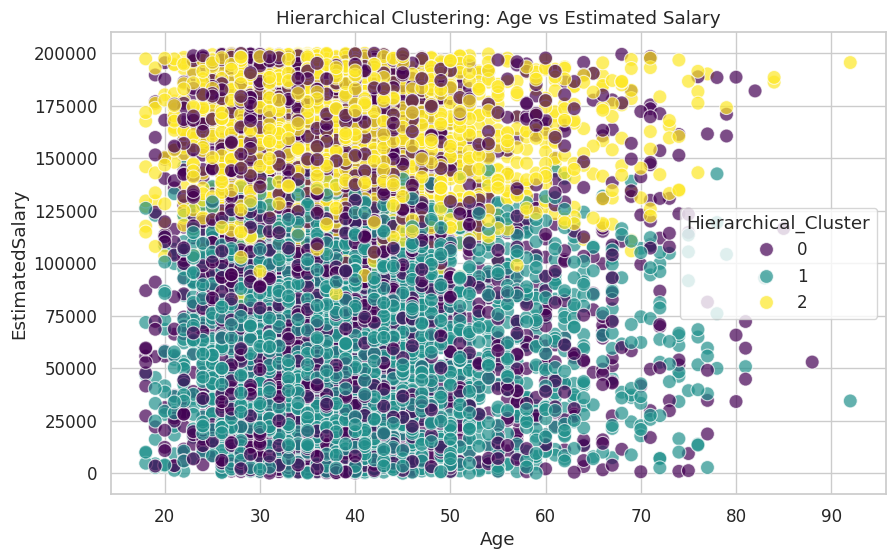

In [103]:
# --- Agglomerative Clustering ---
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=3)
data['Hierarchical_Cluster'] = hierarchical.fit_predict(X)

# Plot Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Hierarchical_Cluster', data=data, palette='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clustering: Age vs Estimated Salary')
plt.show()

#Module 6 - Dimensionality Reduction

In [53]:
# Import necessary libraries
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


##PCA

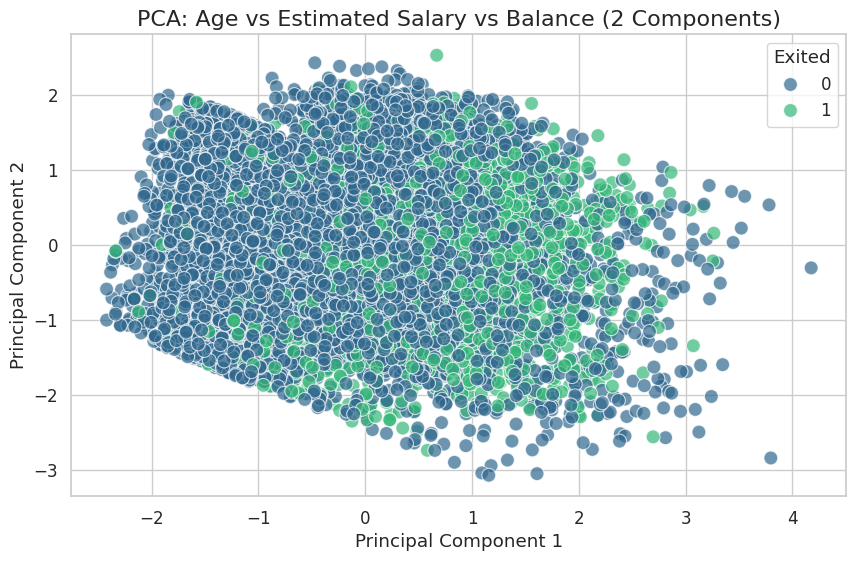


PCA Explained Variance Ratio:
[0.34297473 0.33509155]


In [58]:

# Feature selection for dimensionality reduction
X = data[['Age', 'EstimatedSalary', 'Balance']]

# Standardizing the data for better dimensionality reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Principal Component Analysis (PCA) ---
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Exited'], palette='viridis', s=100, alpha=0.7)
plt.title('PCA: Age vs Estimated Salary vs Balance (2 Components)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance ratio of each component
print("\nPCA Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


##SVD

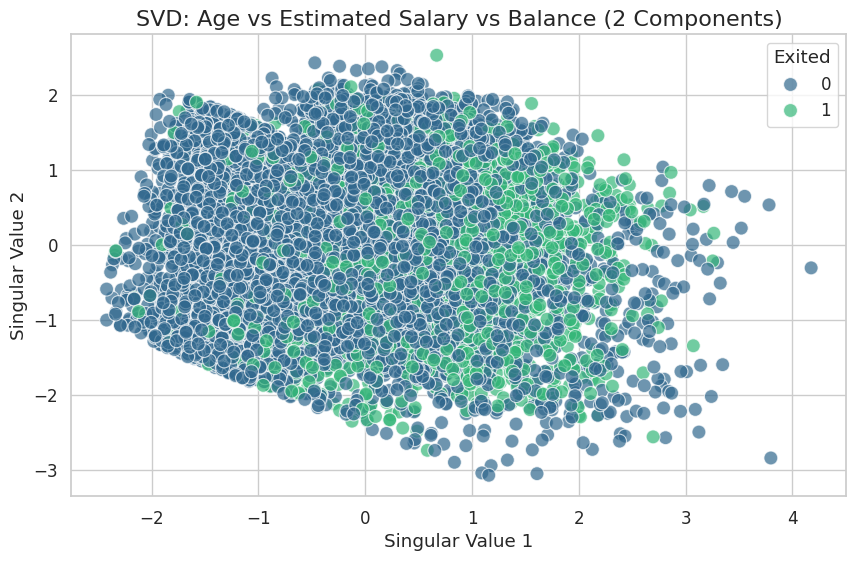


SVD Explained Variance Ratio:
[0.34297473 0.33509155]


In [57]:
# --- Singular Value Decomposition (SVD) ---
svd = TruncatedSVD(n_components=2)  # Reducing to 2 components for visualization
X_svd = svd.fit_transform(X_scaled)

# Plot SVD results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=data['Exited'], palette='viridis', s=100, alpha=0.7)
plt.title('SVD: Age vs Estimated Salary vs Balance (2 Components)', fontsize=16)
plt.xlabel('Singular Value 1')
plt.ylabel('Singular Value 2')
plt.show()

# Explained variance ratio of each component
print("\nSVD Explained Variance Ratio:")
print(svd.explained_variance_ratio_)


##Factor Analysis

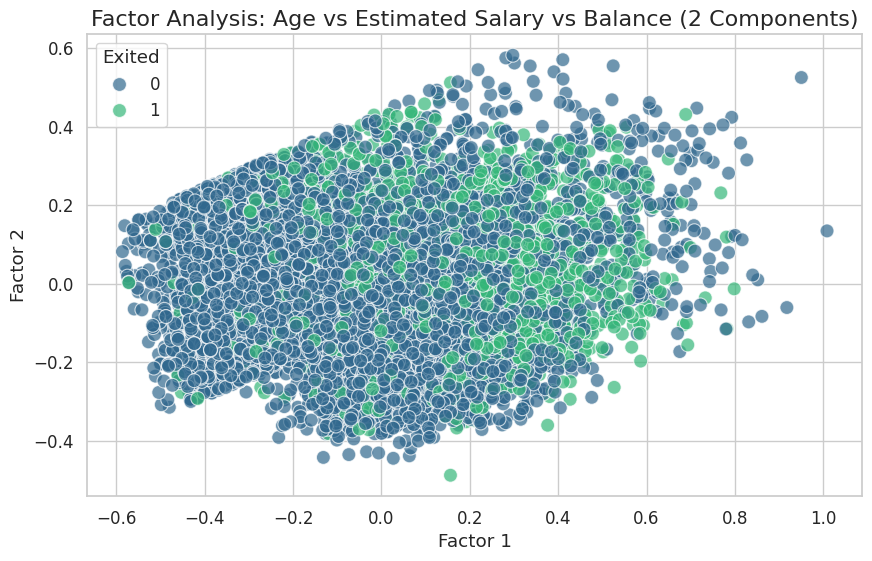

In [59]:
# --- Factor Analysis ---
factor = FactorAnalysis(n_components=2)  # Reducing to 2 components for visualization
X_factor = factor.fit_transform(X_scaled)

# Plot Factor Analysis results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_factor[:, 0], y=X_factor[:, 1], hue=data['Exited'], palette='viridis', s=100, alpha=0.7)
plt.title('Factor Analysis: Age vs Estimated Salary vs Balance (2 Components)', fontsize=16)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()


#Module 7: Model Development and Evaluation

In [106]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [107]:
# Define feature set (X) and target variable (y)
X = data[['Age', 'EstimatedSalary', 'Balance']]  # Features
y = data['Exited']  # Target variable

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
# Standardize the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression:
Accuracy: 0.7870
Precision: 0.2911
Recall: 0.0585
F1-Score: 0.0975
ROC-AUC: 0.7466

Confusion Matrix:


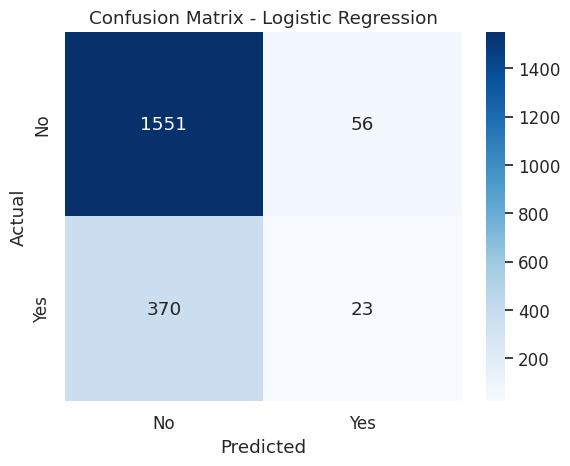

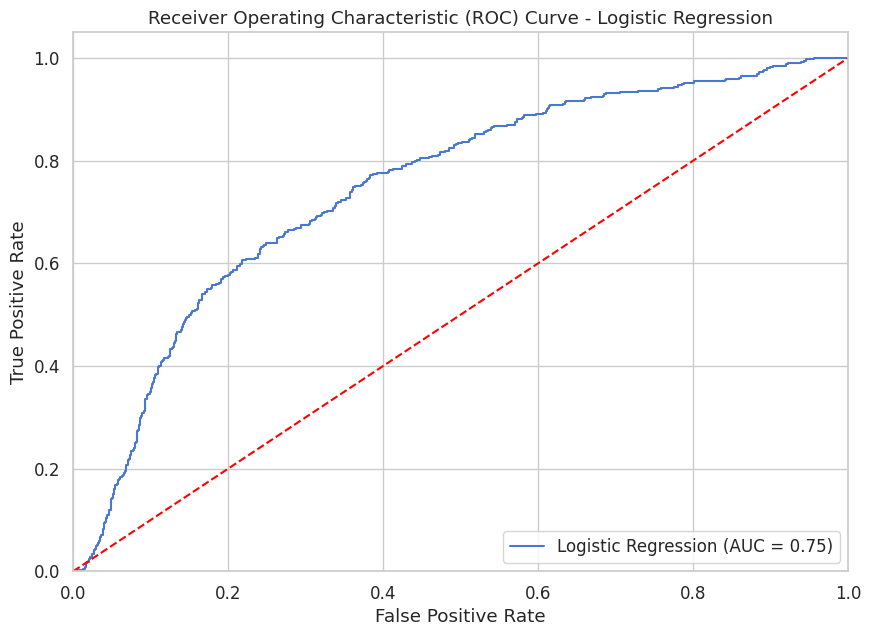

In [109]:

# --- Logistic Regression ---
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Model performance metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

# Print the results
print("Logistic Regression:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")
print(f"ROC-AUC: {roc_auc_log_reg:.4f}")
print("\nConfusion Matrix:")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(10, 7))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

Random Forest Classifier:
Accuracy: 0.7815
Precision: 0.4241
Recall: 0.3130
F1-Score: 0.3602
ROC-AUC: 0.7052

Confusion Matrix:
[[1440  167]
 [ 270  123]]


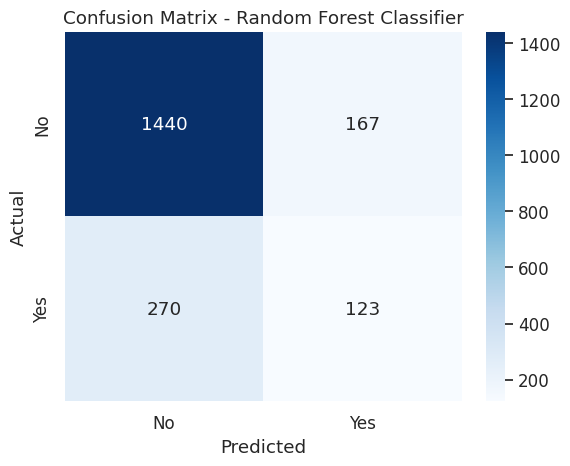

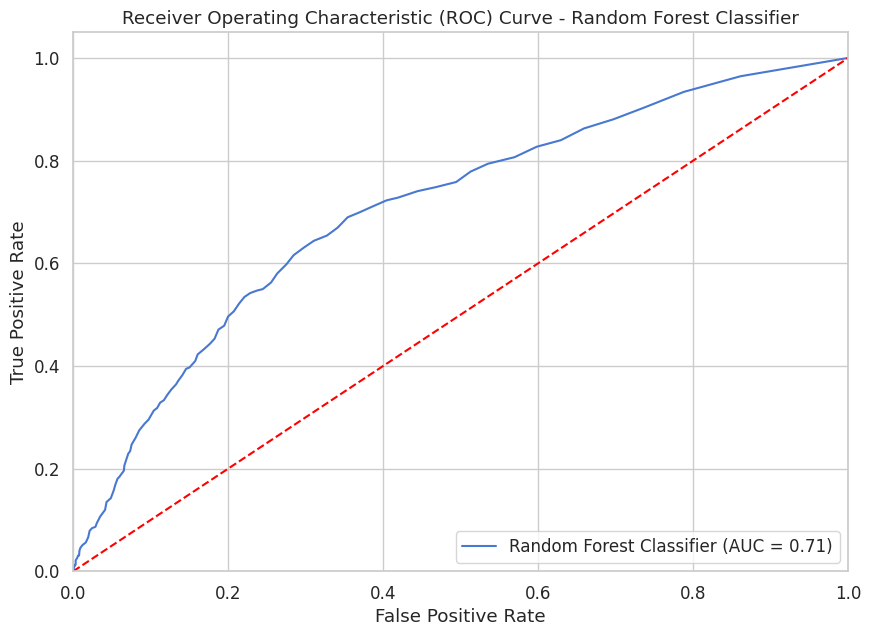

In [110]:
# --- Random Forest Classifier ---
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Model performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

# Print the results
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Classifier (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

Support Vector Machine (SVM):
Accuracy: 0.8160
Precision: 0.5850
Recall: 0.2188
F1-Score: 0.3185
ROC-AUC: 0.6958

Confusion Matrix:
[[1546   61]
 [ 307   86]]


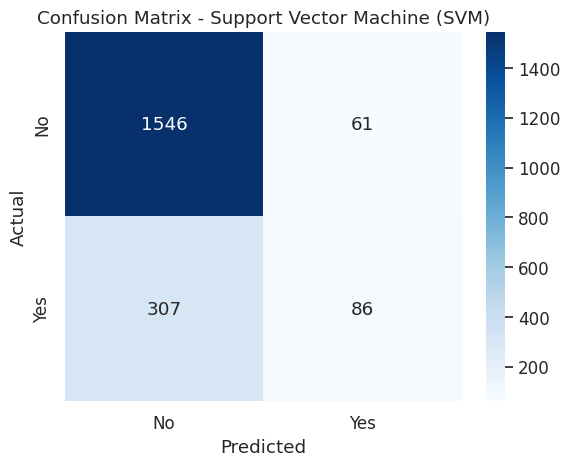

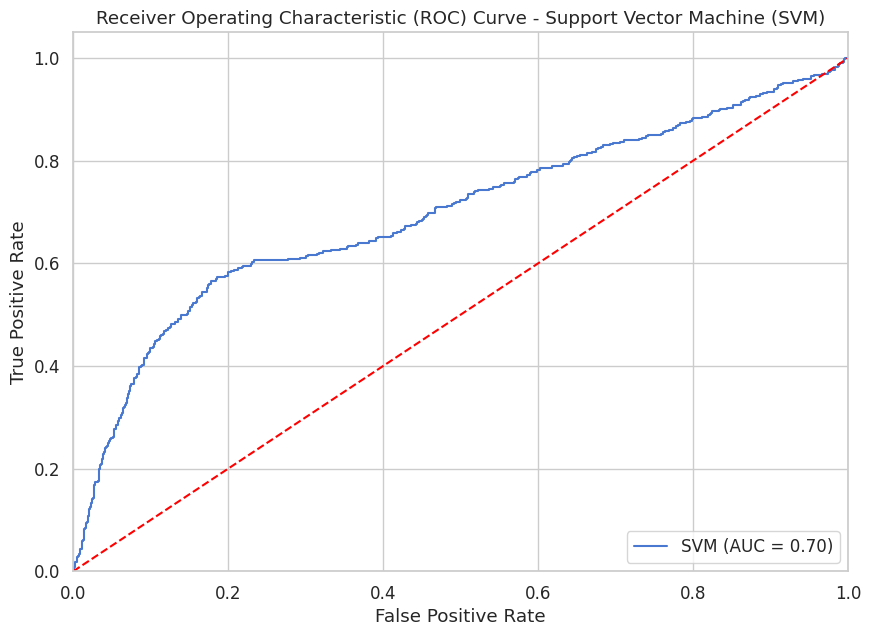

In [111]:
# --- Support Vector Machine (SVM) ---
svm_classifier = SVC(probability=True, random_state=42)  # probability=True to enable probability estimates for ROC-AUC
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Model performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, svm_classifier.predict_proba(X_test_scaled)[:, 1])

# Print the results
print("Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"ROC-AUC: {roc_auc_svm:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_classifier.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(10, 7))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Support Vector Machine (SVM)')
plt.legend(loc="lower right")
plt.show()


Gradient Boosting Classifier:
Accuracy: 0.8155
Precision: 0.5632
Recall: 0.2723
F1-Score: 0.3671
ROC-AUC: 0.7705

Confusion Matrix:
[[1524   83]
 [ 286  107]]


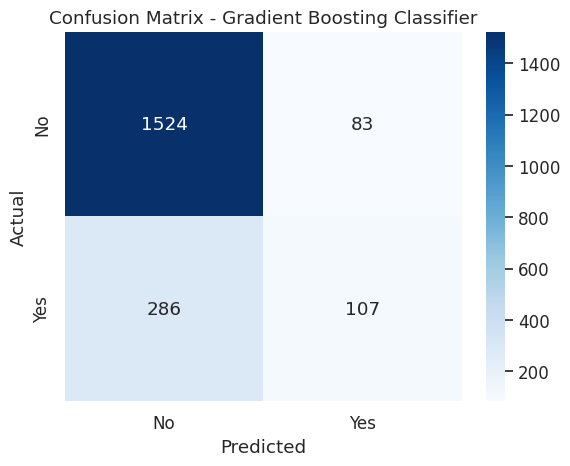

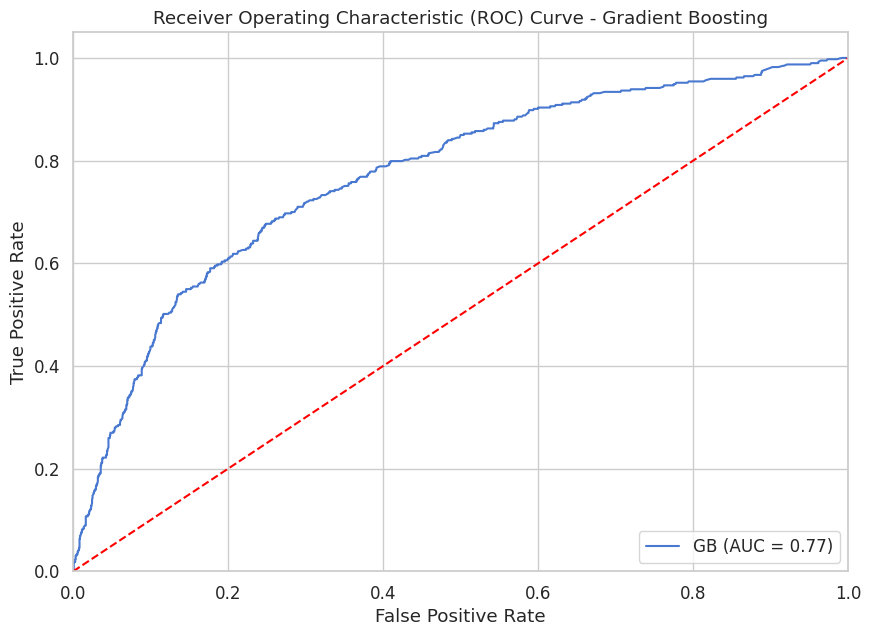

In [112]:
# --- Gradient Boosting Classifier ---
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

# Model performance metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1])

# Print the results
print("Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1-Score: {f1_gb:.4f}")
print(f"ROC-AUC: {roc_auc_gb:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_classifier.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 7))
plt.plot(fpr_gb, tpr_gb, label=f'GB (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()
